In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import folium
import json
from scipy.stats import pearsonr

In [26]:
file_path_medici = "C:/Users/vehico/Documents/Thesis/Distance-project/aggregated_medici_distances_weighted.csv"
df_medici = pd.read_csv(file_path_medici)

df_medici.rename(columns={
    'Comune': 'Municipality',
    'Nucleo_ID': 'UrbanCentre_ID',
    'Popolazione': 'Population',
    'mean_km' : 'Family_Doctors_mean_km',
    'mean_min' : 'Family_Doctors_mean_min',
    'St.Dv_km' : 'Family_Doctors_St.Dv_km',
    'St.Dv_min' : 'Family_Doctors_St.Dv_min',
}, inplace=True)

df_medici.columns.tolist()

['Municipality',
 'UrbanCentre_ID',
 'Population',
 'Family_Doctors_mean_km',
 'Family_Doctors_St.Dv_km',
 'Family_Doctors_mean_min',
 'Family_Doctors_St.Dv_min']

In [27]:
df_medici.head()

,Municipality,UrbanCentre_ID,Population,Family_Doctors_mean_km,Family_Doctors_St.Dv_km,Family_Doctors_mean_min,Family_Doctors_St.Dv_min
0,ACCUMOLI,5700110001,130.0,0.377,NaN,0.850000,NaN
1,ACCUMOLI,5700110002,124.0,6.399,NaN,8.900000,NaN
2,ACCUMOLI,5700110003,12.0,9.035,NaN,15.233333,NaN
3,ACCUMOLI,5700124913,1.0,12.154,NaN,20.316667,NaN
4,ACCUMOLI,5700124914,4.0,14.218,NaN,23.966667,NaN


In [28]:
file_path_hospitals = "C:/Users/vehico/Documents/Thesis/Distance-project/OpenLayers/my-openlayers-project/public/data/aggregated_hospital_distances_weighted.csv"

df_hospitals = pd.read_csv(file_path_hospitals)

df_hospitals.rename(columns={
    'Comune': 'Municipality',
    'Nucleo_ID': 'UrbanCentre_ID',
    'Popolazione': 'Population',
    'mean_km' : 'Hospitals_mean_km',
    'mean_min' : 'Hospitals_mean_min',
    'St.Dv_km' : 'Hospitals_St.Dv_km',
    'St.Dv_min' : 'Hospitals_St.Dv_min',
}, inplace=True)

df_hospitals.columns.tolist()

['Municipality',
 'UrbanCentre_ID',
 'Population',
 'Hospitals_mean_km',
 'Hospitals_St.Dv_km',
 'Hospitals_mean_min',
 'Hospitals_St.Dv_min']

In [43]:
df_hospitals.head()

,Municipality,UrbanCentre_ID,Population,Hospitals_mean_km,Hospitals_St.Dv_km,Hospitals_mean_min,Hospitals_St.Dv_min
0,POZZAGLIA SABINA,5705810001,48.0,48.497,NaN,56.416667,NaN
1,POZZAGLIA SABINA,5705810002,39.0,46.738,NaN,53.833333,NaN
2,POZZAGLIA SABINA,5705820001,79.0,44.175,NaN,50.450000,NaN
3,POZZAGLIA SABINA,5705810003,136.0,45.779,NaN,52.083333,NaN
4,RIVODUTRI,5706010001,78.0,18.414,NaN,23.066667,NaN


In [30]:
# Create a list of dataframes and labels
health_levels = [
    ('Family_doctors', df_medici, 'Family_Doctors_mean_km', 'Family_Doctors_mean_min'),
    ('Hospitals', df_hospitals, 'Hospitals_mean_km', 'Hospitals_mean_min')
]

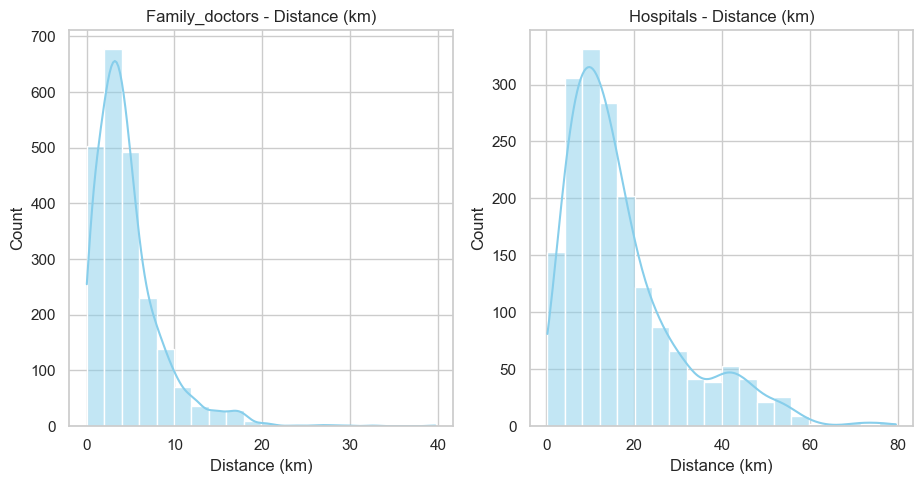

In [33]:
# Plot histograms for distances (km)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))
for i, (label, df_level, dist_km, _) in enumerate(health_levels):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_level[dist_km], bins=20, kde=True, color='skyblue')
    plt.title(f'{label} - Distance (km)')
    plt.xlabel('Distance (km)')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [34]:
for label, df_level, dist_km, dist_min in health_levels:
    print(f"\n📚 {label} Health statistics")
    print("Distance (km):")
    print(df_level[dist_km].describe())


📚 Family_doctors Health statistics
Distance (km):
count    2228.000000
mean        4.663941
std         3.826801
min         0.034000
25%         2.178750
50%         3.814500
75%         5.941750
max        39.681000
Name: Family_Doctors_mean_km, dtype: float64

📚 Hospitals Health statistics
Distance (km):
count    1792.000000
mean       17.291398
std        13.103758
min         0.276000
25%         8.102000
50%        13.631000
75%        22.255000
max        79.549000
Name: Hospitals_mean_km, dtype: float64


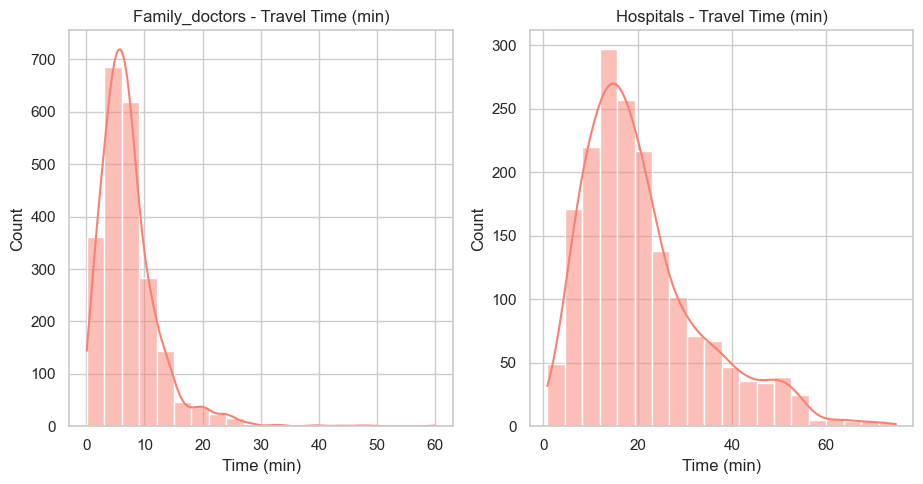

In [35]:
# Plot histograms for travel times (min)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 5))
for i, (label, df_level, _, dist_min) in enumerate(health_levels):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_level[dist_min], bins=20, kde=True, color='salmon')
    plt.title(f'{label} - Travel Time (min)')
    plt.xlabel('Time (min)')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [36]:
# Descriptive statistics for distances and travel times
for label, df_level, dist_km, dist_min in health_levels:
    print(f"\n📚 {label} school statistics")
    print("\nTime (min):")
    print(df_level[dist_min].describe())


📚 Family_doctors school statistics

Time (min):
count    2228.000000
mean        7.289947
std         5.136926
min         0.083333
25%         4.091667
50%         6.372222
75%         9.112500
max        60.000000
Name: Family_Doctors_mean_min, dtype: float64

📚 Hospitals school statistics

Time (min):
count    1792.000000
mean       20.921780
std        12.726542
min         0.900000
25%        12.097917
50%        17.750000
75%        26.441667
max        74.750000
Name: Hospitals_mean_min, dtype: float64


In [39]:
# Function to print rankings
def print_accessibility_rankings(df, label, dist_col, time_col):
    print(f"\n🏫 {label.upper()} SCHOOL ACCESSIBILITY\n")

    # Best 5 by distance
    print("✅ Best 5 (Shortest Distance):")
    print(df[['Municipality', 'UrbanCentre_ID', dist_col]].sort_values(by=dist_col).head(5).to_string(index=False))

    # Worst 5 by distance
    print("\n❌ Worst 5 (Longest Distance):")
    print(df[['Municipality', 'UrbanCentre_ID',dist_col]].sort_values(by=dist_col, ascending=False).head(5).to_string(index=False))

    # Best 5 by time
    print("\n✅ Best 5 (Shortest Time):")
    print(df[['Municipality', 'UrbanCentre_ID',time_col]].sort_values(by=time_col).head(5).to_string(index=False))

    # Worst 5 by time
    print("\n❌ Worst 5 (Longest Time):")
    print(df[['Municipality', 'UrbanCentre_ID',time_col]].sort_values(by=time_col, ascending=False).head(5).to_string(index=False))

In [38]:
print_accessibility_rankings(
    df_medici,
    "Family Doctors",
    "Family_Doctors_mean_km",
    "Family_Doctors_mean_min"
)


🏫 FAMILY DOCTORS SCHOOL ACCESSIBILITY

✅ Best 5 (Shortest Distance):
       Municipality  UrbanCentre_ID  Family_Doctors_mean_km
   BARBARANO ROMANO      5600410001                   0.034
CIVITELLA SAN PAOLO      5803310001                   0.036
   POZZAGLIA SABINA      5705810003                   0.036
           PROSSEDI      5902010002                   0.042
          SACROFANO      5809310003                   0.043

❌ Worst 5 (Longest Distance):
  Municipality  UrbanCentre_ID  Family_Doctors_mean_km
    MICIGLIANO      5703724901                 39.6810
PESCOROCCHIANO      5704910016                 32.5690
PESCOROCCHIANO      5704910006                 29.6055
PESCOROCCHIANO      5704910002                 27.9185
PESCOROCCHIANO      5704910017                 26.9480

✅ Best 5 (Shortest Time):
       Municipality  UrbanCentre_ID  Family_Doctors_mean_min
           PROSSEDI      5902010002                 0.083333
CIVITELLA SAN PAOLO      5803310001                 0.100000

In [40]:
print_accessibility_rankings(
    df_hospitals,
    "Hospitals",
    "Hospitals_mean_km",
    "Hospitals_mean_min"
)


🏫 HOSPITALS SCHOOL ACCESSIBILITY

✅ Best 5 (Shortest Distance):
 Municipality  UrbanCentre_ID  Hospitals_mean_km
     SABAUDIA      5902410005              0.276
     AMATRICE      5700210001              0.308
   COLLEFERRO      5803410001              0.382
MONTEFIASCONE      5603610001              0.396
     PRIVERNO      5901910002              0.468

❌ Worst 5 (Longest Distance):
    Municipality  UrbanCentre_ID  Hospitals_mean_km
  PONZANO ROMANO      5808010001             79.549
TORRITA TIBERINA      5810620001             76.956
TORRITA TIBERINA      5810610002             76.023
      FILACCIANO      5803710001             75.887
         NAZZANO      5806920004             73.109

✅ Best 5 (Shortest Time):
 Municipality  UrbanCentre_ID  Hospitals_mean_min
     SABAUDIA      5902410005            0.900000
     AMATRICE      5700210001            1.016667
MONTEFIASCONE      5603610001            1.183333
   COLLEFERRO      5803410001            1.200000
         POLI      58

In [44]:
# Pulizia medici di famiglia
df_medici_clean = df_medici.copy()
df_medici_clean['Health_Service'] = 'Family_Doctors'
df_medici_clean.rename(columns={
    'Family_Doctors_mean_km': 'Distance_km',
    'Family_Doctors_mean_min': 'Time_min'
}, inplace=True)
df_medici_clean = df_medici_clean[['Municipality', 'UrbanCentre_ID', 'Population', 'Distance_km', 'Time_min', 'Health_Service']]

# Pulizia ospedali
df_hospitals_clean = df_hospitals.copy()
df_hospitals_clean['Health_Service'] = 'Hospitals'
df_hospitals_clean.rename(columns={
    'Hospitals_mean_km': 'Distance_km',
    'Hospitals_mean_min': 'Time_min'
}, inplace=True)
df_hospitals_clean = df_hospitals_clean[['Municipality', 'UrbanCentre_ID', 'Population', 'Distance_km', 'Time_min', 'Health_Service']]

# Unione dei due dataset
df_health_long = pd.concat([df_medici_clean, df_hospitals_clean], ignore_index=True)


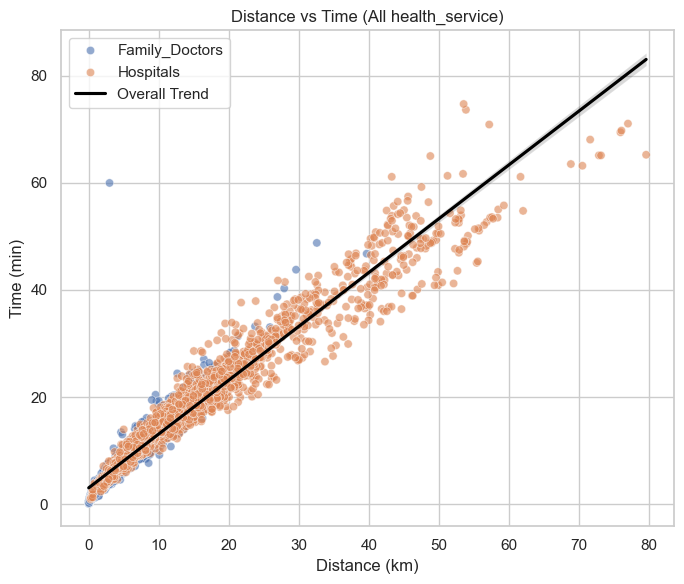

In [46]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df_health_long, x='Distance_km', y='Time_min', hue='Health_Service', alpha=0.6)
sns.regplot(data=df_health_long, x='Distance_km', y='Time_min', scatter=False, color='black', label='Overall Trend')
plt.title("Distance vs Time (All health_service)")
plt.xlabel("Distance (km)")
plt.ylabel("Time (min)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:

df_corr = df_health_long[['Distance_km', 'Time_min']].dropna()
r_all, pval_all = pearsonr(df_corr['Distance_km'], df_corr['Time_min'])
print(f"🔗 Overall Pearson correlation: r = {r_all:.3f} (p-value = {pval_all:.3e})")

🔗 Overall Pearson correlation: r = 0.973 (p-value = 0.000e+00)


In [56]:
# Drop missing
df_clean = df_health_long[['Distance_km', 'Time_min']].dropna()

# Fit linear model
X = df_clean[['Distance_km']]
y = df_clean['Time_min']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Add residuals to the DataFrame
df_clean['Residual'] = y - y_pred
df_clean['AbsResidual'] = np.abs(df_clean['Residual'])

In [58]:
# Filtra solo righe valide (senza NaN)
df_clean = df_health_long.dropna(subset=['Distance_km', 'Time_min'])

# Fit linear regression
X = df_clean[['Distance_km']]
y = df_clean['Time_min']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Aggiungi residui al dataframe originale (non ridotto!)
df_clean['Residual'] = y - y_pred
df_clean['AbsResidual'] = np.abs(df_clean['Residual'])

# Trova i top 10 outlier (maggior tempo rispetto a quanto previsto dalla distanza)
top_outliers = df_clean.sort_values(by='AbsResidual', ascending=False).head(10)

# Mostra le colonne chiave
print("🚨 Top 10 outliers (unexpected high/low travel time):")
print(top_outliers[['Municipality', 'UrbanCentre_ID', 'Health_Service', 'Distance_km', 'Time_min', 'Residual']])


🚨 Top 10 outliers (unexpected high/low travel time):
             Municipality  UrbanCentre_ID  Health_Service  Distance_km  \
2216  VILLA SANTO STEFANO      6009026710  Family_Doctors        3.000   
2893           COLLEGIOVE      5702010001       Hospitals       53.516   
3330       PONZANO ROMANO      5808010001       Hospitals       79.549   
2891      COLLALTO SABINO      5701820001       Hospitals       53.839   
3685            FILETTINO      6003410001       Hospitals       43.259   
2839            BORGOROSE      5700720009       Hospitals       52.084   
2834            BORGOROSE      5700710010       Hospitals       55.368   
2838            BORGOROSE      5700710007       Hospitals       55.537   
1409       PESCOROCCHIANO      5704910016  Family_Doctors       32.569   
3067       PESCOROCCHIANO      5704910016       Hospitals       48.763   

       Time_min   Residual  
2216  60.000000  53.974158  
2893  74.750000  17.876467  
3330  65.266667 -17.810801  
2891  73.666667 

C:\Users\vehico\AppData\Local\Temp\ipykernel_15332\4073415440.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Residual'] = y - y_pred
C:\Users\vehico\AppData\Local\Temp\ipykernel_15332\4073415440.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AbsResidual'] = np.abs(df_clean['Residual'])
